In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten

In [ ]:
df=pd.read_csv("/content/amazon_alexa.tsv",sep="\t")
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

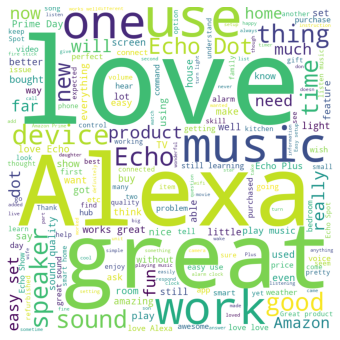

In [ ]:
#check positive response
wc=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wc.generate(''.join(df[df['feedback']==1]['verified_reviews']))

plt.figure(figsize=(6,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

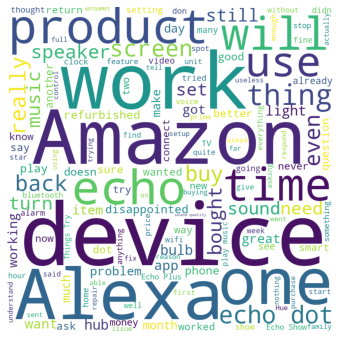

In [ ]:
#check negative response
wc=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wc.generate(''.join(df[df['feedback']==0]['verified_reviews']))

plt.figure(figsize=(6,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
X=df['verified_reviews']
Y=df['feedback']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
tok=Tokenizer()
tok.fit_on_texts(X_train)

In [ ]:
tok.index_word

{1: 'the',
 2: 'i',
 3: 'to',
 4: 'it',
 5: 'and',
 6: 'a',
 7: 'my',
 8: 'is',
 9: 'for',
 10: 'love',
 11: 'echo',
 12: 'this',
 13: 'with',
 14: 'have',
 15: 'of',
 16: 'great',
 17: 'in',
 18: 'that',
 19: 'on',
 20: 'but',
 21: 'alexa',
 22: 'so',
 23: 'you',
 24: 'music',
 25: 'as',
 26: 'not',
 27: 'use',
 28: 'like',
 29: 'up',
 30: 'can',
 31: 'was',
 32: 'we',
 33: 'works',
 34: 'be',
 35: 'all',
 36: 'very',
 37: 'easy',
 38: 'just',
 39: 'sound',
 40: 'set',
 41: 'more',
 42: 'one',
 43: 'good',
 44: 'me',
 45: 'do',
 46: 'are',
 47: 'when',
 48: 'dot',
 49: 'product',
 50: 'an',
 51: 'or',
 52: 'amazon',
 53: 'if',
 54: 'get',
 55: 'speaker',
 56: 'device',
 57: 'has',
 58: 'home',
 59: '34',
 60: "it's",
 61: 'still',
 62: 'had',
 63: 'from',
 64: 'play',
 65: 'really',
 66: 'at',
 67: 'she',
 68: 'will',
 69: 'would',
 70: 'prime',
 71: 'am',
 72: 'what',
 73: 'other',
 74: 'our',
 75: 'time',
 76: 'out',
 77: 'also',
 78: 'smart',
 79: 'than',
 80: 'no',
 81: 'much',
 8

In [ ]:
vocab_len=len(tok.index_word)
vocab_len

3632

In [ ]:
train_sequence=tok.texts_to_sequences(X_train)
train_sequence

[[33, 83, 13, 2123, 519, 1519, 8, 43, 61, 435, 28, 1520, 8, 1234, 19, 44],
 [61, 146, 135, 3, 21, 20, 2, 163, 765, 6, 1521],
 [2, 10, 12, 56, 246, 375, 331, 1, 41, 23, 408, 76, 4, 30, 45],
 [],
 [16,
  49,
  114,
  6,
  349,
  6,
  2124,
  3,
  40,
  29,
  376,
  75,
  128,
  190,
  17,
  2125,
  2126,
  20,
  33,
  191,
  87,
  2,
  135,
  4,
  25,
  108,
  125,
  24,
  17,
  158,
  10,
  4],
 [65, 282, 7, 377, 520, 599, 3, 54, 1051, 15, 389, 460, 6, 766, 15, 234],
 [36, 215, 5, 482, 15, 89, 135, 9, 6, 409, 5, 61, 120, 122, 390],
 [10,
  12,
  845,
  50,
  235,
  108,
  125,
  17,
  7,
  158,
  13,
  12,
  10,
  18,
  4,
  846,
  66,
  266,
  36,
  700,
  3,
  220],
 [10,
  1,
  11,
  101,
  150,
  117,
  3,
  142,
  1,
  521,
  15,
  1,
  303,
  25,
  109,
  64,
  51,
  3,
  34,
  117,
  3,
  391,
  6,
  1522,
  29,
  19,
  1,
  151,
  8,
  350],
 [12, 8, 7, 159, 21, 925, 56, 5, 22, 93, 122, 1523, 29, 3, 122, 1524],
 [10,
  4,
  31,
  926,
  104,
  1,
  221,
  311,
  66,
  159,
  20,

In [ ]:
doc_len=[]
for doc in train_sequence:
  doc_len.append(len(doc))


In [ ]:
max(doc_len)

555

In [ ]:
np.quantile(doc_len,0.99)

151.96000000000004

In [ ]:
max_len=151

In [ ]:
train_matrix=sequence.pad_sequences(train_sequence,maxlen=max_len)

In [ ]:
train_matrix

array([[   0,    0,    0, ..., 1234,   19,   44],
       [   0,    0,    0, ...,  765,    6, 1521],
       [   0,    0,    0, ...,    4,   30,   45],
       ...,
       [   0,    0,    0, ...,  315,   16,   49],
       [   0,    0,    0, ...,    0,  525,  570],
       [   0,    0,    0, ...,    1,   11,  141]], dtype=int32)

In [ ]:
test_sequence=tok.texts_to_sequences(X_test)

In [ ]:
test_sequence

[[174,
  115,
  431,
  13,
  4,
  1,
  108,
  306,
  15,
  196,
  258,
  92,
  1,
  476,
  258,
  5,
  21,
  756,
  655,
  67,
  8],
 [2,
  88,
  12,
  3,
  762,
  6,
  59,
  48,
  59,
  17,
  7,
  316,
  96,
  55,
  8,
  1222,
  84,
  4,
  857,
  44,
  84,
  249,
  1,
  132,
  834,
  4,
  203,
  319,
  51,
  487,
  3,
  7,
  862,
  25,
  83,
  25,
  1,
  48,
  2,
  14,
  3,
  667,
  188,
  51,
  237,
  196,
  3,
  54,
  4,
  3,
  45,
  72,
  2,
  129,
  1,
  48,
  1588,
  97,
  527,
  72,
  2,
  129,
  19,
  1,
  159,
  667,
  2,
  139,
  2057,
  4,
  50,
  976],
 [2,
  88,
  4,
  3,
  219,
  13,
  7,
  542,
  453,
  363,
  20,
  4,
  197,
  26,
  1344,
  28,
  2,
  224,
  4,
  69,
  4,
  203,
  2895,
  324,
  47,
  553,
  8,
  66,
  1,
  613,
  77,
  2,
  178,
  457,
  3,
  1,
  906,
  66,
  1,
  613,
  183,
  1,
  11,
  101,
  90,
  183,
  7,
  611,
  134],
 [16, 49, 5, 33, 16],
 [281,
  10,
  4,
  242,
  81,
  63,
  6,
  606,
  2,
  622,
  477,
  17,
  5,
  88,
  42,
  1393,
  38,


In [ ]:
test_matrix=sequence.pad_sequences(test_sequence,maxlen=max_len)
test_matrix

array([[  0,   0,   0, ..., 655,  67,   8],
       [  0,   0,   0, ...,   4,  50, 976],
       [  0,   0,   0, ...,   7, 611, 134],
       ...,
       [  0,   0,   0, ..., 427,  11,  48],
       [  0,   0,   0, ...,  10,   1,  48],
       [  0,   0,   0, ..., 482,  15,  24]], dtype=int32)

In [ ]:
model=Sequential()
model.add(Embedding(vocab_len+1,60,input_length=max_len,mask_zero=True))
model.add(Flatten())
model.add(Dense(70,activation='tanh'))
model.add(Dense(60,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy')
model.fit(train_matrix,Y_train,epochs=5,batch_size=100)

Epoch 1/5
23/23 [==============================] - 1s 22ms/step - loss: 0.3230
Epoch 2/5
23/23 [==============================] - 0s 21ms/step - loss: 0.2705
Epoch 3/5
23/23 [==============================] - 0s 19ms/step - loss: 0.2321
Epoch 4/5
23/23 [==============================] - 0s 21ms/step - loss: 0.1413
Epoch 5/5
23/23 [==============================] - 0s 18ms/step - loss: 0.0641


In [ ]:
Y_pred=model.predict(test_matrix)
Y_pred=np.where(Y_pred>=0.5,1,0)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.48      0.57        73
           1       0.96      0.98      0.97       872

    accuracy                           0.94       945
   macro avg       0.83      0.73      0.77       945
weighted avg       0.94      0.94      0.94       945



In [ ]:
from tensorflow.keras.layers import SimpleRNN,Bidirectional,LSTM,GRU

In [ ]:
#SIMPLE RNN
model1=Sequential()
model1.add(Embedding(vocab_len+1,60,input_length=max_len,mask_zero=True))
model1.add(SimpleRNN(64))
model1.add(Dense(70,activation='tanh'))
model1.add(Dense(60,activation='tanh'))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model1.fit(train_matrix,Y_train,epochs=5,batch_size=100)

Epoch 1/5
23/23 [==============================] - 5s 132ms/step - loss: 0.4023
Epoch 2/5
23/23 [==============================] - 3s 133ms/step - loss: 0.2750
Epoch 3/5
23/23 [==============================] - 3s 125ms/step - loss: 0.2356
Epoch 4/5
23/23 [==============================] - 3s 130ms/step - loss: 0.1819
Epoch 5/5
23/23 [==============================] - 3s 114ms/step - loss: 0.0706


In [ ]:
Y_pred1=model1.predict(test_matrix)
Y_pred1=np.where(Y_pred>=0.5,1,0)
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.70      0.48      0.57        73
           1       0.96      0.98      0.97       872

    accuracy                           0.94       945
   macro avg       0.83      0.73      0.77       945
weighted avg       0.94      0.94      0.94       945



In [ ]:
#to improve model accuarcy Bidirection will be used
model2=Sequential()
model2.add(Embedding(vocab_len+1,60,input_length=max_len,mask_zero=True))
model2.add(Bidirectional(SimpleRNN(64)))
model2.add(Dense(70,activation='tanh'))
model2.add(Dense(60,activation='tanh'))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model2.fit(train_matrix,Y_train,epochs=5,batch_size=100)

Epoch 1/5
23/23 [==============================] - 5s 118ms/step - loss: 0.3791
Epoch 2/5
23/23 [==============================] - 3s 118ms/step - loss: 0.2503
Epoch 3/5
23/23 [==============================] - 3s 118ms/step - loss: 0.1337
Epoch 4/5
23/23 [==============================] - 3s 117ms/step - loss: 0.0443
Epoch 5/5
23/23 [==============================] - 3s 117ms/step - loss: 0.0227


In [ ]:
Y_pred2=model1.predict(test_matrix)
Y_pred2=np.where(Y_pred>=0.5,1,0)
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.48      0.57        73
           1       0.96      0.98      0.97       872

    accuracy                           0.94       945
   macro avg       0.83      0.73      0.77       945
weighted avg       0.94      0.94      0.94       945



In [ ]:
#to improve model accuarcy LSTM will be used
model3=Sequential()
model3.add(Embedding(vocab_len+1,60,input_length=max_len,mask_zero=True))
model3.add(LSTM(64))
model3.add(Dense(70,activation='tanh'))
model3.add(Dense(64,activation='tanh'))
model3.add(Dense(1,activation='sigmoid'))     #always use minimum 64 nuerons
model3.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model3.fit(train_matrix,Y_train,epochs=5,batch_size=100)

Epoch 1/5
23/23 [==============================] - 7s 132ms/step - loss: 0.4608
Epoch 2/5
23/23 [==============================] - 3s 132ms/step - loss: 0.2557
Epoch 3/5
23/23 [==============================] - 4s 184ms/step - loss: 0.1801
Epoch 4/5
23/23 [==============================] - 3s 133ms/step - loss: 0.0972
Epoch 5/5
23/23 [==============================] - 3s 132ms/step - loss: 0.0520


In [ ]:
Y_pred3=model3.predict(test_matrix)
Y_pred3=np.where(Y_pred3>=0.5,1,0)
print(classification_report(Y_test,Y_pred3))

              precision    recall  f1-score   support

           0       0.63      0.58      0.60        73
           1       0.96      0.97      0.97       872

    accuracy                           0.94       945
   macro avg       0.80      0.77      0.78       945
weighted avg       0.94      0.94      0.94       945



In [ ]:
#to improve model accuarcy GRU will be used
model4=Sequential()
model4.add(Embedding(vocab_len+1,60,input_length=max_len,mask_zero=True))
model4.add(GRU(120))
model4.add(Dense(70,activation='tanh'))
model4.add(Dense(64,activation='tanh'))
model4.add(Dense(1,activation='sigmoid'))     #always use minimum 64 nuerons
model4.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model4.fit(train_matrix,Y_train,epochs=5,batch_size=100)

Epoch 1/5
23/23 [==============================] - 8s 207ms/step - loss: 0.4426
Epoch 2/5
23/23 [==============================] - 5s 207ms/step - loss: 0.2562
Epoch 3/5
23/23 [==============================] - 5s 206ms/step - loss: 0.1881
Epoch 4/5
23/23 [==============================] - 5s 216ms/step - loss: 0.1070
Epoch 5/5
23/23 [==============================] - 8s 365ms/step - loss: 0.0628


In [ ]:
Y_pred4=model4.predict(test_matrix)
Y_pred4=np.where(Y_pred4>=0.5,1,0)
print(classification_report(Y_test,Y_pred4))

              precision    recall  f1-score   support

           0       0.51      0.47      0.49        73
           1       0.96      0.96      0.96       872

    accuracy                           0.92       945
   macro avg       0.73      0.71      0.72       945
weighted avg       0.92      0.92      0.92       945



In [ ]:
#WE got same accuracy 94% for all SimpleRNN,Bidirection,LSTM and we got 92% accuracy for GRU